## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# %matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_csv = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

#merged_csv = mouse_metadata.add(study_results)

# Display the data table for preview
merged_df = pd.DataFrame(merged_csv)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

unique_mice = merged_df["Mouse ID"].unique()
unique_ice_count = len(unique_mice)
print(f"Number of mice: {unique_ice_count}")

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint, EXCEPT THE FIRST OCCURENCE OF EACH DUPLICATE
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF = merged_df[merged_df.duplicated(['Mouse ID', "Timepoint"], keep=False)]

#Get the duplicate mice ID
duplicate_miceID = duplicateRowsDF['Mouse ID'].unique()

print(duplicateRowsDF)
print(f"---------------------------------------------")
print(f"Duplicated mice ID: {duplicate_miceID}")

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Alternative: clean_df = merged_df.drop_duplicates(subset =["Mouse ID", "Timepoint"], keep=False) 
clean_df = merged_df.loc[merged_df['Mouse ID'] != 'g989']

print(merged_df.count())
print(f"---------------------------------------------")
print(clean_df.count())


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
---------------------------------------------
Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64


In [5]:
# Checking the number of mice in the clean DataFrame.
unique_mice_cleandf = clean_df["Mouse ID"].unique()
unique_ice__cleandf_count = len(unique_mice_cleandf)
print(f"Number of mice: {unique_ice__cleandf_count}")

Number of mice: 248


## Summary Statistics

In [6]:
clean_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#from scipy.stats import sem
import numpy as np
import scipy.stats as sp

mean_tumourV = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_tumourV = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
std_tumourV = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
var_tumourV = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sems_tumourV = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Format all float values in the table to 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

#Create data frame for stats table
TumourVolume_Stats_df = pd.DataFrame({
                      
                         "Mean": mean_tumourV,
                         "Median": med_tumourV,
                         "Std": std_tumourV,
                         "Var": var_tumourV,
                         "Sem": sems_tumourV
    
                            })

print(TumourVolume_Stats_df)

              Mean  Median  Std   Var  Sem
Drug Regimen                              
Capomulin    40.68   41.56 4.99 24.95 0.33
Ceftamin     52.59   51.78 6.27 39.29 0.47
Infubinol    52.88   51.82 6.57 43.13 0.49
Ketapril     55.24   53.70 8.28 68.55 0.60
Naftisol     54.33   52.51 8.13 66.17 0.60
Placebo      54.03   52.29 7.82 61.17 0.58
Propriva     52.32   50.45 6.62 43.85 0.54
Ramicane     40.22   40.67 4.85 23.49 0.32
Stelasyn     54.23   52.43 7.71 59.45 0.57
Zoniferol    53.24   51.82 6.97 48.53 0.52


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
# df.groupby("col_to_group_by").agg([func_1, func_2, func_3])

aggregated_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.std, np.var, sp.sem])
aggregated_stats

C:\Users\navyh\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\navyh\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\navyh\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.32,50.45,6.62,43.85,0.54
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


## Bar and Pie Charts

In [9]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [10]:
# USE PANDA: Generate a bar plot showing the total number of unique mice tested on each drug regimen.

micecount_onregime = clean_df["Drug Regimen"].value_counts()


Text(0, 0.5, 'Mice Count')

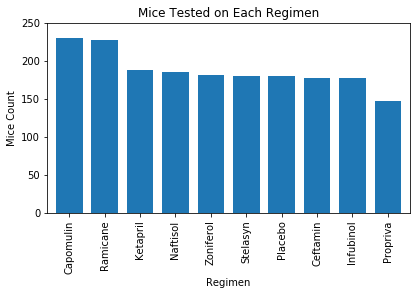

In [11]:
#Plot using Panda, operate on series data itself
micecount_onregime.plot(kind="bar", title="Mice Tested on Each Regimen", figsize=(6.5,3.5), width = 0.75, ylim=(0,250))
plt.xlabel("Regimen")
plt.ylabel("Mice Count")


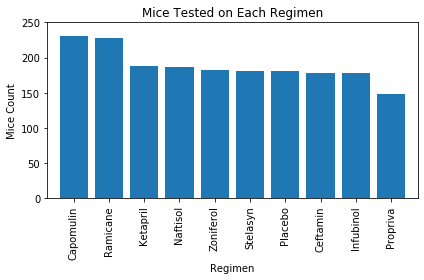

In [12]:
# Plot using Pyplot, Generate a bar plot showing the total number of unique mice tested on each drug regimen.
x = np.arange(len(micecount_onregime))
height = micecount_onregime.values

labels = micecount_onregime.index.values
tick_locations = [value for value in x]

plt.bar(x, height)
plt.xticks(tick_locations,labels, rotation=90)
plt.xlim(-0.75, len(x) -0.25)
plt.ylim(0,max(height)+20)
plt.xlabel("Regimen")
plt.ylabel("Mice Count")
plt.title("Mice Tested on Each Regimen")
plt.tight_layout()
plt.show()



In [13]:
gender_counts = clean_df["Sex"].value_counts()
gender_counts

Male      958
Female    922
Name: Sex, dtype: int64

C:\Users\navyh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, '')

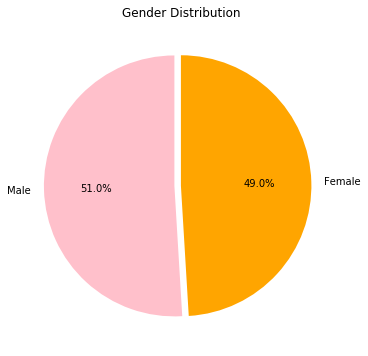

In [23]:
# Plot using Panda, Generate a pie plot showing the distribution of female versus male mice
colors =["pink", "orange"]

gender_counts.plot(kind="pie",  title="Gender Distribution", explode=(0.05,0), startangle=90, figsize=(6,6), autopct='%1.1f%%', colors=colors)
plt.axes().set_ylabel('')


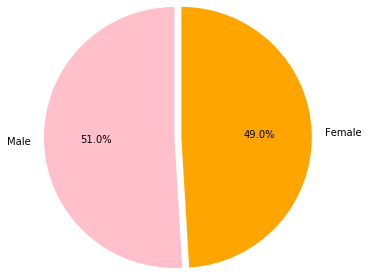

In [16]:
# Plot using pyplot, Generate a pie plot showing the distribution of female versus male mice.
labels = gender_counts.index.values
percentage = gender_counts.values
colors =["pink", "orange"]

plt.pie(percentage, explode=(0.08,0), labels=labels, startangle=90, autopct='%1.1f%%', colors=colors, radius=1.5)

plt.show()


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

latest_tumourV = []

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_id_list = latest_timepoint.index.values
latest_timepoint_list = latest_timepoint.values

df = pd.DataFrame({
                "Mouse ID": mouse_id_list,
                "Timepoint": latest_timepoint_list
                })

df

merge_df = pd.merge(df, clean_df, on=["Mouse ID","Timepoint"], how="left")

merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [90]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 213.1+ KB


In [91]:
# Only keep the rows with 4 regimens of interest: Capomulin, Ramicane, Infubinol, and Ceftamin
analysis_df = merge_df.loc[(merged_df['Drug Regimen'] == 'Capomulin')]
analysis_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
10,a520,45,Ramicane,Male,13,21,38.81,1
11,a577,30,Infubinol,Female,6,25,57.03,2
12,a644,45,Ramicane,Female,7,17,32.98,1
13,a685,45,Infubinol,Male,8,30,66.08,3
14,a699,45,Propriva,Female,5,28,62.19,1
...,...,...,...,...,...,...,...,...
240,y865,45,Ceftamin,Male,23,26,64.73,3
241,z234,5,Naftisol,Female,19,27,46.13,1
242,z314,5,Stelasyn,Female,21,28,45.93,0
243,z435,10,Propriva,Female,12,26,48.71,0


In [68]:
#Spot check, look for latest tumour volume 
# clean_df.loc[clean_df["Mouse ID"] =='a251',:]

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_list = []
mouse_list = []
Volume_list = []

for regimen in regimens_interest:
    for row in analysis_df["Drug Regimen"]:
        if merge_df["Drug Regimen"] = regimen:
            regimen_list
        
    
# Create empty list to fill with tumor vol data (for plotting)
Tumor_V_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
